In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
 

from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('dataset.csv')


In [4]:
# Encoding our Labels
data['v1']=data['v1'].apply(lambda x: 1 if x=='spam' else 0)

In [5]:
import re
# preprocessing the Messages
new_data=[]

for i in range(data.shape[0]):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(stemmer.stem(i))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

In [6]:
#Bigram Modelling and Vectorization

vectorizer = CountVectorizer(ngram_range=(1,2))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

In [8]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
print("Confusion Matrix - {}\nClassification Report - {}\n".format(log_conf,log_class))

Confusion Matrix - [[26  2]
 [ 4 18]]
Classification Report -               precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.90      0.82      0.86        22

    accuracy                           0.88        50
   macro avg       0.88      0.87      0.88        50
weighted avg       0.88      0.88      0.88        50




## Support Vector Machine

In [9]:
from sklearn.svm import SVC
  
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)

In [10]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
svc_acc = accuracy_score(Y_test,Y_pred) * 100
svc_conf = confusion_matrix(Y_test,Y_pred)
svc_class = classification_report(Y_test,Y_pred)
svc_prec = precision_score(Y_test,Y_pred)
svc_rec = recall_score(Y_test,Y_pred)
svc_fscore = f1_score(Y_test,Y_pred)
print("Confusion Matrix - {}\nClassification Report - {}\n".format(svc_conf,svc_class))

Confusion Matrix - [[26  2]
 [ 4 18]]
Classification Report -               precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.90      0.82      0.86        22

    accuracy                           0.88        50
   macro avg       0.88      0.87      0.88        50
weighted avg       0.88      0.88      0.88        50




## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100) 
ranfor.fit(X_train, Y_train)
Y_pred = ranfor.predict(X_test)

In [12]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
ranfor_acc = accuracy_score(Y_test,Y_pred) * 100
ranfor_conf = confusion_matrix(Y_test,Y_pred)
ranfor_class = classification_report(Y_test,Y_pred)
ranfor_prec = precision_score(Y_test,Y_pred)
ranfor_rec = recall_score(Y_test,Y_pred)
ranfor_fscore = f1_score(Y_test,Y_pred)
print("Confusion Matrix - {}\nClassification Report - {}\n".format(ranfor_conf,ranfor_class))

Confusion Matrix - [[28  0]
 [ 7 15]]
Classification Report -               precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.68      0.81        22

    accuracy                           0.86        50
   macro avg       0.90      0.84      0.85        50
weighted avg       0.89      0.86      0.85        50




## XGBoost

In [13]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, Y_train)
Y_pred = xgb_clf.predict(X_test)

In [14]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
xgb_clf_acc = accuracy_score(Y_test,Y_pred) * 100
xgb_clf_conf = confusion_matrix(Y_test,Y_pred)
xgb_clf_class = classification_report(Y_test,Y_pred)
xgb_clf_prec = precision_score(Y_test,Y_pred)
xgb_clf_rec = recall_score(Y_test,Y_pred)
xgb_clf_fscore = f1_score(Y_test,Y_pred)
print("Confusion Matrix - {}\nClassification Report - {}\n".format(xgb_clf_conf,xgb_clf_class))

Confusion Matrix - [[23  5]
 [ 2 20]]
Classification Report -               precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.80      0.91      0.85        22

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50




## AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50)
ada_clf.fit(X_train, Y_train)
Y_pred = ada_clf.predict(X_test)

In [16]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
ada_clf_acc = accuracy_score(Y_test,Y_pred) * 100
ada_clf_conf = confusion_matrix(Y_test,Y_pred)
ada_clf_class = classification_report(Y_test,Y_pred)
ada_clf_prec = precision_score(Y_test,Y_pred)
ada_clf_rec = recall_score(Y_test,Y_pred)
ada_clf_fscore = f1_score(Y_test,Y_pred)
print("Confusion Matrix - {}\nClassification Report - {}\n".format(ada_clf_conf,ada_clf_class))
print(ada_clf_rec)

Confusion Matrix - [[25  3]
 [ 4 18]]
Classification Report -               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.86      0.82      0.84        22

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50


0.8181818181818182


In [17]:
eval_df = pd.DataFrame(columns=['Classification Model', 'Accuracy','Precision','Recall','F1_Score'])

eval_df['Classification Model'] = ['Logistic Regression','Support Vector Machines', 'Random Forest', 'XGBoost', 'AdaBoost']

eval_df['Accuracy'] = [log_acc,svc_acc,ranfor_acc,xgb_clf_acc,ada_clf_acc]
eval_df['Precision'] = [log_prec,svc_prec,ranfor_prec,xgb_clf_prec,ada_clf_prec]
eval_df['Recall'] = [log_rec,svc_rec,ranfor_rec,xgb_clf_rec,ada_clf_rec]
eval_df['F1_Score'] = [log_fscore,svc_fscore,ranfor_fscore,xgb_clf_fscore,ada_clf_fscore]

In [18]:
eval_df

,Classification Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,88.0,0.900000,0.818182,0.857143
1,Support Vector Machines,88.0,0.900000,0.818182,0.857143
2,Random Forest,86.0,1.000000,0.681818,0.810811
3,XGBoost,86.0,0.800000,0.909091,0.851064
4,AdaBoost,86.0,0.857143,0.818182,0.837209


[]

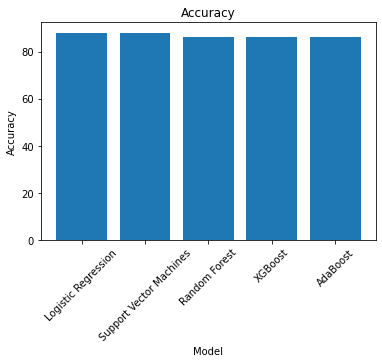

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(eval_df['Classification Model'],eval_df['Accuracy'])
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot()

[]

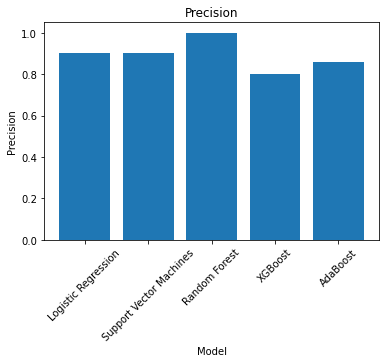

In [20]:
plt.bar(eval_df['Classification Model'],eval_df['Precision'])
plt.title('Precision')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.plot()

[]

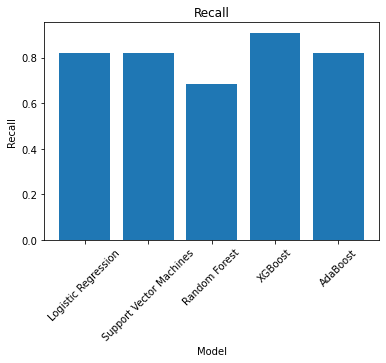

In [21]:
plt.bar(eval_df['Classification Model'],eval_df['Recall'])
plt.title('Recall')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.plot()

[]

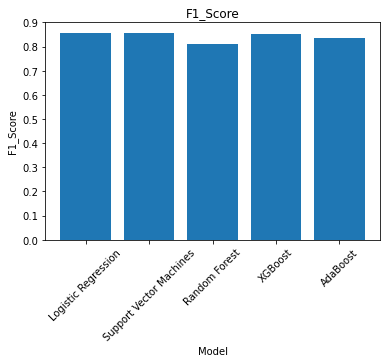

In [22]:
plt.bar(eval_df['Classification Model'],eval_df['F1_Score'])
plt.title('F1_Score')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('F1_Score')
plt.plot()